# A simple SEA model of two rooms with a dividing wall

In this notebook we create a simple SEA model of two rooms divided by a concrete wall.

We start by importing some of the modules that are needed.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('float_format', '{:.2e}'.format)
import matplotlib
%matplotlib inline

## Creating a SEA model

To create a SEA model we begin by creating an instance of `System`.

In [2]:
from seapy import System
from acoustics.signal import OctaveBand
f = OctaveBand(fstart=20.0, fstop=4000.0, fraction=1)

In [3]:
system1 = System(f)

We are only interested in a limited frequency range, e.g. the third octave bands ranging from 1000 to 4000 Hz.

### Materials

The rooms are filled with air, so we add air as material.

In [4]:
air = system1.add_material('air', 
                           'MaterialGas',
                           density = 1.296,
                           temperature = 293.0,
                           bulk = 1.01e5,
                           loss_factor=0.05)

In [5]:
concrete = system1.add_material('concrete', 
                                'MaterialSolid', 
                                young=3.0e10, 
                                poisson=0.15,
                                density=2.3e3,
                                loss_factor=0.02)

We don't know the shear modulus of concrete, so let's calculate it. With the function ``modulus`` we can calculate for an isotropic material any elastic modulus given two other ones.

In [6]:
from seapy.materials.materialsolid import modulus
concrete.shear = modulus('shear', young=3.0e10, poisson=0.15)

Just to be sure, we can list the properties of the concrete.

In [7]:
concrete.info(['density',
               'poisson',
               'young',
               'shear',])

,15,31,63,125,251,501,1000,1995,3981
density,2.30e+03,2.30e+03,2.30e+03,2.30e+03,2.30e+03,2.30e+03,2.30e+03,2.30e+03,2.30e+03
poisson,1.50e-01,1.50e-01,1.50e-01,1.50e-01,1.50e-01,1.50e-01,1.50e-01,1.50e-01,1.50e-01
young,3.00e+10,3.00e+10,3.00e+10,3.00e+10,3.00e+10,3.00e+10,3.00e+10,3.00e+10,3.00e+10
shear,1.30e+10,1.30e+10,1.30e+10,1.30e+10,1.30e+10,1.30e+10,1.30e+10,1.30e+10,1.30e+10


### Rooms and wall

Now we add the two rooms.

In [8]:
room1 = system1.add_component('room1', 
                              'Component3DAcoustical', 
                              material='air',
                              length=4.0,
                              height=2.5,
                              width=5.0)

In [9]:
room2 = system1.add_component('room2', 
                              'Component3DAcoustical', 
                              material='air',
                              length=5.0,
                              height=2.5,
                              width=5.0)

Given the material type and the volume we can for example calculate the mass of the air in the room

In [10]:
room1.mass

array([64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8, 64.8])

or plot the modal density of the subsystem representing longitudinal waves

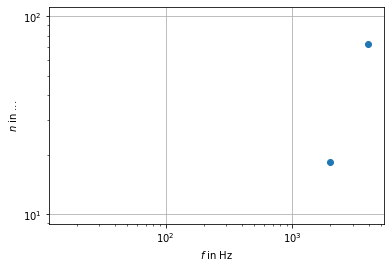

In [11]:
fig = room1.subsystem_long.plot("modal_density", yscale='log')

We now add the concrete wall.

In [12]:
wall = system1.add_component('wall', 
                             'Component2DPlate', 
                             material='concrete', 
                             length=3.0,
                             width=2.5,
                             height=0.05)

Let's have a look at the modal densities of the subsystems.

In [13]:
system1.info(system1.subsystems, 'modal_density')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,1.15e-03,4.60e-03,1.83e-02,7.28e-02,2.90e-01,1.15e+00,4.60e+00,1.83e+01,7.28e+01
room2_SubsystemLong,1.44e-03,5.75e-03,2.29e-02,9.11e-02,3.63e-01,1.44e+00,5.75e+00,2.29e+01,9.11e+01
wall_SubsystemLong,8.91e-06,1.78e-05,3.55e-05,7.08e-05,1.41e-04,2.82e-04,5.62e-04,1.12e-03,2.24e-03
wall_SubsystemBend,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02
wall_SubsystemShear,2.10e-05,4.18e-05,8.34e-05,1.66e-04,3.32e-04,6.63e-04,1.32e-03,2.64e-03,5.26e-03


The modal density of the subsystem representing bending waves in the wall seems to remain constant.

It's also possible to inspect objects further. For example, as was shown with the mass of the room, it is possible to request e.g. multiple parameters.

In [14]:
wall.subsystem_bend.info(['soundspeed_group', 
                          'soundspeed_phase', 
                          'modal_density',
                          'average_frequency_spacing',
                          'power_input',
                          'dlf',
                          'tlf',])

,15,31,63,125,251,501,1000,1995,3981
soundspeed_group,1.45e+02,2.05e+02,2.89e+02,4.08e+02,5.77e+02,8.15e+02,1.15e+03,1.63e+03,2.30e+03
soundspeed_phase,7.25e+01,1.02e+02,1.45e+02,2.04e+02,2.88e+02,4.07e+02,5.76e+02,8.13e+02,1.15e+03
modal_density,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02,1.13e-02
average_frequency_spacing,1.41e+01,1.41e+01,1.41e+01,1.41e+01,1.41e+01,1.41e+01,1.41e+01,1.41e+01,1.41e+01
power_input,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00
dlf,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02
tlf,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02,2.00e-02


Shown is now a table, but what is returned is in fact a [pandas DataFrame](http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html). Pandas is a data analysis toolkit and offers powerful tools to analyse data and to export data to e.g. spreadsheet formats like Excel.

### Junction

The rooms and the wall form a junction and connect along a surface.

In [15]:
junction1 = system1.add_junction('junction1', 'Junction', shape='Surface', components=['room1', 
                                                                                      'room2', 
                                                                                      'wall'])

Now, when we call ``junction1.update_couplings`` it tries to determine all the couplings between the subsystems of the components that were added.

In [16]:
junction1.update_couplings()

We can now for example see the coupling loss factors of all the couplings that were added.

In [17]:
system1.info(system1.couplings, 'clf')

/home/freddy/code/other/seapy/seapy/couplings/couplingsurfaceacoustical.py:47: RuntimeWarning: invalid value encountered in log
  C1 = (2.0 * mu2 - 1.0) * (mu2 + 1.0) ** 2.0 * np.log(mu2 - 1.0)


,15,31,63,125,251,501,1000,1995,3981
room2_SubsystemLong_wall_SubsystemLong,3.23e-04,4.29e-05,5.90e-06,1.12e-06,1.31e-05,7.44e-07,7.80e-08,9.14e-09,1.11e-09
room2_SubsystemLong_wall_SubsystemBend,3.23e-04,4.29e-05,5.90e-06,1.12e-06,1.31e-05,7.44e-07,7.80e-08,9.14e-09,1.11e-09
room2_SubsystemLong_wall_SubsystemShear,3.23e-04,4.29e-05,5.90e-06,1.12e-06,1.31e-05,7.44e-07,7.80e-08,9.14e-09,1.11e-09
room2_SubsystemLong_room1_SubsystemLong,4.17e-05,3.39e-05,8.04e-06,1.74e-06,1.25e-05,3.04e-09,1.96e-11,1.66e-13,1.47e-15
wall_SubsystemLong_room2_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01
wall_SubsystemLong_room1_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01
wall_SubsystemBend_room2_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01
wall_SubsystemBend_room1_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01
wall_SubsystemShear_room2_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01
wall_SubsystemShear_room1_SubsystemLong,1.06e+00,5.59e-01,3.06e-01,2.32e-01,1.08e+01,2.43e+00,1.02e+00,4.74e-01,2.30e-01


Now that both the coupling loss factors and damping loss factors are known we can also list the total loss factor

In [18]:
system1.info(system1.subsystems, 'tlf')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,5.13e-02,5.02e-02,5.00e-02,5.00e-02,5.01e-02,5.00e-02,5.00e-02,5.00e-02,5.00e-02
room2_SubsystemLong,5.10e-02,5.02e-02,5.00e-02,5.00e-02,5.01e-02,5.00e-02,5.00e-02,5.00e-02,5.00e-02
wall_SubsystemLong,2.13e+00,1.14e+00,6.32e-01,4.84e-01,2.15e+01,4.89e+00,2.05e+00,9.68e-01,4.80e-01
wall_SubsystemBend,2.13e+00,1.14e+00,6.32e-01,4.84e-01,2.15e+01,4.89e+00,2.05e+00,9.68e-01,4.80e-01
wall_SubsystemShear,2.13e+00,1.14e+00,6.32e-01,4.84e-01,2.15e+01,4.89e+00,2.05e+00,9.68e-01,4.80e-01


The coupling loss factor of the coupling between the rooms is based on the non-resonant transmission coefficient.

In [19]:
system1.get_object('room1_SubsystemLong_room2_SubsystemLong').info(['tau', 'sound_reduction_index'])

,15,31,63,125,251,501,1000,1995,3981
tau,4.96e-04,8.04e-04,3.80e-04,1.64e-04,2.35e-03,1.14e-06,1.47e-08,2.49e-10,4.40e-12
sound_reduction_index,3.30e+01,3.09e+01,3.42e+01,3.79e+01,2.63e+01,5.94e+01,7.83e+01,9.60e+01,1.14e+02


In [20]:
system1.get_object('wall_SubsystemBend_room1_SubsystemLong').info(['critical_frequency'])

,15,31,63,125,251,501,1000,1995,3981
critical_frequency,2.35e+02,2.35e+02,2.35e+02,2.35e+02,2.35e+02,2.35e+02,2.35e+02,2.35e+02,2.35e+02


### Excitation

We have defined the subsystems and couplings. What's left is to add an excitation to the system.

In [21]:
excitation1 = room1.subsystem_long.add_excitation('excitation1', 
                                                 'ExcitationPointVolume', 
                                                 velocity=0.001,
                                                 radius=0.05)

The input power $P$ depends on the volume velocity $U$ of the source and the real part of the radiation impedance, i.e. the radiation resistance $R$.

In [22]:
excitation1.info(['resistance'])

,15,31,63,125,251,501,1000,1995,3981
resistance,3.66e+00,1.46e+01,5.81e+01,2.31e+02,9.20e+02,3.66e+03,1.46e+04,5.81e+04,2.31e+05


The resistance increases with frequency and therefore the radiated power increases similary.

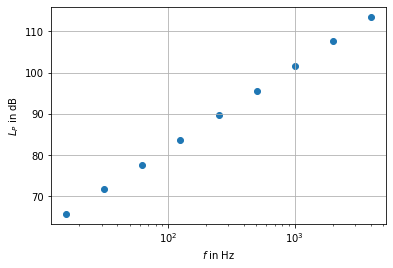

In [23]:
fig = excitation1.plot('power_level')

## Solving the system

Now we can solve the system.

In [24]:
system1.solve()

True

We can have a look at the modal energy

In [25]:
system1.info(system1.subsystems, 'modal_energy')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.29e-04,3.19e-04,1.60e-04,8.02e-05,4.02e-05,2.02e-05,1.01e-05,5.06e-06,2.54e-06
room2_SubsystemLong,6.49e-06,6.17e-07,5.31e-08,5.37e-09,2.57e-08,4.49e-10,2.34e-11,1.36e-12,8.13e-14
wall_SubsystemLong,1.56e-05,3.89e-06,9.64e-07,2.40e-07,6.27e-08,1.57e-08,3.92e-09,9.75e-10,2.40e-10
wall_SubsystemBend,1.23e-08,6.11e-09,3.02e-09,1.50e-09,7.82e-10,3.91e-10,1.95e-10,9.66e-11,4.74e-11
wall_SubsystemShear,6.62e-06,1.65e-06,4.10e-07,1.02e-07,2.67e-08,6.68e-09,1.67e-09,4.14e-10,1.02e-10


but those values are generally hard to interpret. Instead, we could just request the sound pressure levels in the rooms

In [26]:
system1.info(['room1', 'room2'], 'pressure_level')

,15,31,63,125,251,501,1000,1995,3981
room1,6.56e+01,6.87e+01,7.17e+01,7.47e+01,7.77e+01,8.07e+01,8.37e+01,8.67e+01,8.97e+01
room2,4.58e+01,4.16e+01,3.69e+01,3.30e+01,4.58e+01,3.42e+01,2.73e+01,2.10e+01,1.48e+01


or plot them.

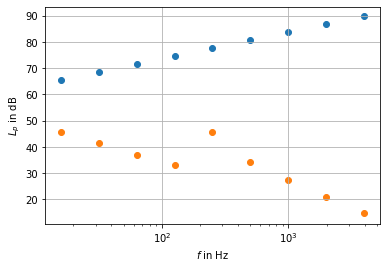

In [27]:
fig = system1.plot(['room1', 'room2'], 'pressure_level')

Let's consider the sound pressure level difference between the two rooms.

In [28]:
(room1.info(['pressure_level']) - room2.info(['pressure_level']))

,15,31,63,125,251,501,1000,1995,3981
pressure_level,1.99e+01,2.71e+01,3.48e+01,4.17e+01,3.19e+01,4.65e+01,5.64e+01,6.57e+01,7.49e+01


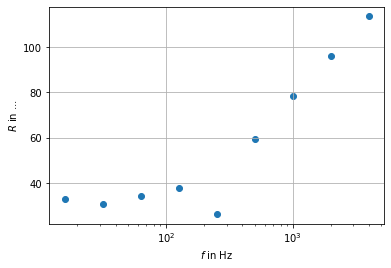

In [29]:
fig = system1.get_object('room1_SubsystemLong_room2_SubsystemLong').plot('sound_reduction_index')

Obviously, we can also look at the modal energies

In [30]:
system1.info(system1.subsystems, 'modal_energy')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.29e-04,3.19e-04,1.60e-04,8.02e-05,4.02e-05,2.02e-05,1.01e-05,5.06e-06,2.54e-06
room2_SubsystemLong,6.49e-06,6.17e-07,5.31e-08,5.37e-09,2.57e-08,4.49e-10,2.34e-11,1.36e-12,8.13e-14
wall_SubsystemLong,1.56e-05,3.89e-06,9.64e-07,2.40e-07,6.27e-08,1.57e-08,3.92e-09,9.75e-10,2.40e-10
wall_SubsystemBend,1.23e-08,6.11e-09,3.02e-09,1.50e-09,7.82e-10,3.91e-10,1.95e-10,9.66e-11,4.74e-11
wall_SubsystemShear,6.62e-06,1.65e-06,4.10e-07,1.02e-07,2.67e-08,6.68e-09,1.67e-09,4.14e-10,1.02e-10


or see the level contributions of the individual subsystems.

In [31]:
system1.info(system1.subsystems, 'velocity_level')

,15,31,63,125,251,501,1000,1995,3981
wall_SubsystemLong,1.81e+01,1.51e+01,1.20e+01,8.96e+00,6.13e+00,3.12e+00,9.70e-02,-2.95e+00,-6.05e+00
wall_SubsystemBend,1.81e+01,1.51e+01,1.20e+01,8.96e+00,6.13e+00,3.12e+00,9.70e-02,-2.95e+00,-6.05e+00
wall_SubsystemShear,1.81e+01,1.51e+01,1.20e+01,8.96e+00,6.13e+00,3.12e+00,9.70e-02,-2.95e+00,-6.05e+00


In [32]:
system1.info(system1.subsystems, 'pressure_level')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.56e+01,6.87e+01,7.17e+01,7.47e+01,7.77e+01,8.07e+01,8.37e+01,8.67e+01,8.97e+01
room2_SubsystemLong,4.58e+01,4.16e+01,3.69e+01,3.30e+01,4.58e+01,3.42e+01,2.73e+01,2.10e+01,1.48e+01


## Path analysis and graphs

All the objects in `SeaPy` remember to which other objects they're connected. For example, we can list the subsystems in a component.

In [33]:
for obj in wall.linked_subsystems:
    print(obj.name)

wall_SubsystemLong
wall_SubsystemBend
wall_SubsystemShear


As soon as a model gets a bit bigger it can be hard to track which objects are connected. One way to help with keeping an overview is by drawing graphs.

In [34]:
import networkx as nx

The following graph shows the relation between components and subsystems.

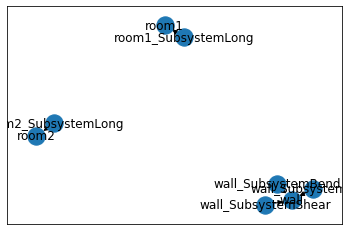

In [35]:
G = system1.path_analysis.graph(['components', 'subsystems'])
nx.draw_networkx(G)

We can also show for example subsystems and couplings.

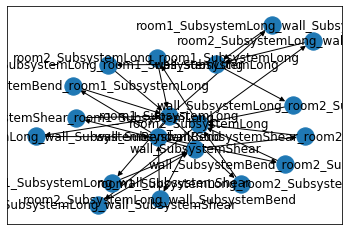

In [36]:
G = system1.path_analysis.graph(['subsystems', 'couplings'])
fig = nx.draw_networkx(G)

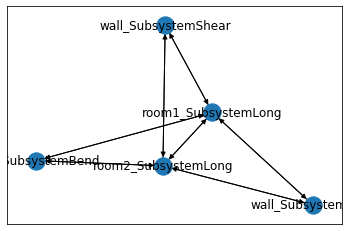

In [37]:
from seapy.tools import graph_couplings
G = graph_couplings(system1)
fig = nx.draw_networkx(G)

### Path analysis

By creating graphs of subsystems and couplings it is also straightforward to check whether subsystems are in anyway connected

In [38]:
system1.path_analysis.has_path('room1_SubsystemLong', 'room2_SubsystemLong')

True

and to determine the possible paths between any two subsystems.

In [39]:
for path in system1.path_analysis.paths('room1_SubsystemLong', 'room2_SubsystemLong'):
    print(path)

['room1_SubsystemLong', 'room1_SubsystemLong_room2_SubsystemLong', 'room2_SubsystemLong']
['room1_SubsystemLong', 'room1_SubsystemLong_wall_SubsystemLong', 'wall_SubsystemLong', 'wall_SubsystemLong_room2_SubsystemLong', 'room2_SubsystemLong']
['room1_SubsystemLong', 'room1_SubsystemLong_wall_SubsystemBend', 'wall_SubsystemBend', 'wall_SubsystemBend_room2_SubsystemLong', 'room2_SubsystemLong']
['room1_SubsystemLong', 'room1_SubsystemLong_wall_SubsystemShear', 'wall_SubsystemShear', 'wall_SubsystemShear_room2_SubsystemLong', 'room2_SubsystemLong']


We can also calculate the level difference due to a transmission path.

In [40]:
for path in system1.path_analysis.paths('room1_SubsystemLong', 'room2_SubsystemLong'):
    print(path.level_difference)

[ 17.00621048  17.74085731  23.96392852  30.61403018  22.06843924
  58.17653612  80.07905729 100.80229496 121.32852029]
[11.1665731  19.80809168 28.45595676 35.70438975 24.86662376 37.32544224
 47.14344664 56.50148141 65.73574304]
[11.1665731  19.80809168 28.45595676 35.70438975 24.86662376 37.32544224
 47.14344664 56.50148141 65.73574304]
[11.1665731  19.80809168 28.45595676 35.70438975 24.86662376 37.32544224
 47.14344664 56.50148141 65.73574304]


In [41]:
list(system1.path_analysis.paths('room1_SubsystemLong', 'room2_SubsystemLong'))[0].level_difference

array([ 17.00621048,  17.74085731,  23.96392852,  30.61403018,
        22.06843924,  58.17653612,  80.07905729, 100.80229496,
       121.32852029])

## Saving and restoring a model

SEA models can be saved as YAML.

In [42]:
system1.save("model.yaml")

YAML is a human-readable file format. Models can be implemented or edited in the YAML file if desired.

In [43]:
!head -n 20 model.yaml

components:
- enabled: true
  height: 2.5
  length: 4.0
  material: air
  model: Component3DAcoustical
  name: room1
  width: 5.0
- enabled: true
  height: 2.5
  length: 5.0
  material: air
  model: Component3DAcoustical
  name: room2
  width: 5.0
- enabled: true
  height: 0.05
  length: 3.0
  material: concrete
  model: Component2DPlate


Loading is done using the `load` method.

In [44]:
system2 = System.load("model.yaml")

/home/freddy/code/other/seapy/seapy/system.py:416: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


To verify whether the models are similar we check the modal energy.

In [45]:
system1.info(system1.subsystems, 'modal_energy')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.29e-04,3.19e-04,1.60e-04,8.02e-05,4.02e-05,2.02e-05,1.01e-05,5.06e-06,2.54e-06
room2_SubsystemLong,6.49e-06,6.17e-07,5.31e-08,5.37e-09,2.57e-08,4.49e-10,2.34e-11,1.36e-12,8.13e-14
wall_SubsystemLong,1.56e-05,3.89e-06,9.64e-07,2.40e-07,6.27e-08,1.57e-08,3.92e-09,9.75e-10,2.40e-10
wall_SubsystemBend,1.23e-08,6.11e-09,3.02e-09,1.50e-09,7.82e-10,3.91e-10,1.95e-10,9.66e-11,4.74e-11
wall_SubsystemShear,6.62e-06,1.65e-06,4.10e-07,1.02e-07,2.67e-08,6.68e-09,1.67e-09,4.14e-10,1.02e-10


In [46]:
system2.info(system2.subsystems, 'modal_energy')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.29e-04,3.19e-04,1.60e-04,8.02e-05,4.02e-05,2.02e-05,1.01e-05,5.06e-06,2.54e-06
room2_SubsystemLong,6.49e-06,6.17e-07,5.31e-08,5.37e-09,2.57e-08,4.49e-10,2.34e-11,1.36e-12,8.13e-14
wall_SubsystemLong,1.56e-05,3.89e-06,9.64e-07,2.40e-07,6.27e-08,1.57e-08,3.92e-09,9.75e-10,2.40e-10
wall_SubsystemBend,1.23e-08,6.11e-09,3.02e-09,1.50e-09,7.82e-10,3.91e-10,1.95e-10,9.66e-11,4.74e-11
wall_SubsystemShear,6.62e-06,1.65e-06,4.10e-07,1.02e-07,2.67e-08,6.68e-09,1.67e-09,4.14e-10,1.02e-10


That looks correctly. To be really sure we just calculate the modal energies again in the second model, to verify that other parameters have also been restored.

In [47]:
system2.solve()
system2.info(system2.subsystems, 'modal_energy')

,15,31,63,125,251,501,1000,1995,3981
room1_SubsystemLong,6.29e-04,3.19e-04,1.60e-04,8.02e-05,4.02e-05,2.02e-05,1.01e-05,5.06e-06,2.54e-06
room2_SubsystemLong,6.49e-06,6.17e-07,5.31e-08,5.37e-09,2.57e-08,4.49e-10,2.34e-11,1.36e-12,8.13e-14
wall_SubsystemLong,1.56e-05,3.89e-06,9.64e-07,2.40e-07,6.27e-08,1.57e-08,3.92e-09,9.75e-10,2.40e-10
wall_SubsystemBend,1.23e-08,6.11e-09,3.02e-09,1.50e-09,7.82e-10,3.91e-10,1.95e-10,9.66e-11,4.74e-11
wall_SubsystemShear,6.62e-06,1.65e-06,4.10e-07,1.02e-07,2.67e-08,6.68e-09,1.67e-09,4.14e-10,1.02e-10


Same results.

## Source code and documentation

Source code of seapy can be found at [GitHub](https://github.com/FRidh/seapy) and documentation right [here](http://www.fridh.nl/seapy/).

In [48]:
from IPython.display import IFrame
IFrame("https://seapy.readthedocs.io/en/latest/", width=800, height=600)